In [8]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline

In [9]:
rec = pd.read_csv("City of Pittsburgh Playing Fields.csv", index_col = "id")

In [10]:
rec

,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,backstop,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,
1914615260,Arlington Field 1,t,Arlington Park,Diamond Only,0,Skinned,160.0,230.0,290.0,NaN,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418314,-79.975007
1151740179,Armstrong,f,Armstrong Park,Diamond and Rectangular,0,Skinned,240.0,163.0,122.0,NaN,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428074,-79.985662
971009139,Bandbox,f,Arsenal Park,Diamond Only,0,Skinned,135.0,200.0,150.0,NaN,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466331,-79.961299
1581124728,Banksville,f,Banksville Park,Diamond Only,0,Skinned,304.0,354.0,373.0,NaN,Banksville,2,20,42003202300,5,20,6,4-9,40.413923,-80.039940
1052125703,Banksville School,t,Banksville School Park,Diamond Only,0,Skinned,180.0,175.0,185.0,NaN,Banksville,2,20,42003202300,5,20,6,4-9,40.407059,-80.037870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88488317,Westwood Field 2,t,Westwood School Park,Diamond and Rectangular,0,Skinned,360.0,255.0,160.0,NaN,Westwood,2,28,42003563100,5,28,6,1-18,40.430285,-80.050228
1139931087,Wightman,f,Wightman Park,Diamond Only,0,Skinned,268.0,195.0,167.0,NaN,Squirrel Hill North,8,14,42003140300,3,14,4,2-18,40.443402,-79.927392
916748391,Willie Stargell,t,Homewood Park,Diamond and Rectangular,0,Skinned,365.0,295.0,225.0,NaN,Homewood South,9,13,42003130300,2,13,5,3-17,40.453815,-79.899708


In [11]:
numrec = rec.groupby('neighborhood').count()
numrec

,name,has_lights,park,field_usage,goal_post,infield_type,left_field_distance,center_field_distance,right_field_distance,backstop,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,,,
Allegheny Center,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Allentown,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1
Arlington,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
Banksville,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Bedford Dwellings,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Beechview,3,3,3,3,3,2,2,2,2,0,3,3,3,3,3,3,3,3,3
Beltzhoover,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3,3,3,3,3
Brighton Heights,7,7,7,7,7,7,7,7,7,0,7,7,7,7,7,7,7,7,7
Brookline,6,6,6,6,6,5,5,5,5,0,6,6,6,6,6,6,6,6,6


In [12]:
playground = pd.read_csv("Playgrounds.csv")

In [13]:
play = playground.groupby('neighborhood').count()

In [27]:
recreation = pd.concat([numrec, play])['park']
recreation.sort_values()

neighborhood
East Allegheny         0
Bon Air                1
Homewood North         1
Hays                   1
Fineview               1
                      ..
South Side Slopes      5
Brookline              6
South Side Slopes      6
Brighton Heights       7
Squirrel Hill South    8
Name: park, Length: 119, dtype: int64

In [15]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

In [16]:
rec_map = neighborhoods.merge(recreation, how='left', left_on='hood', right_on='neighborhood')

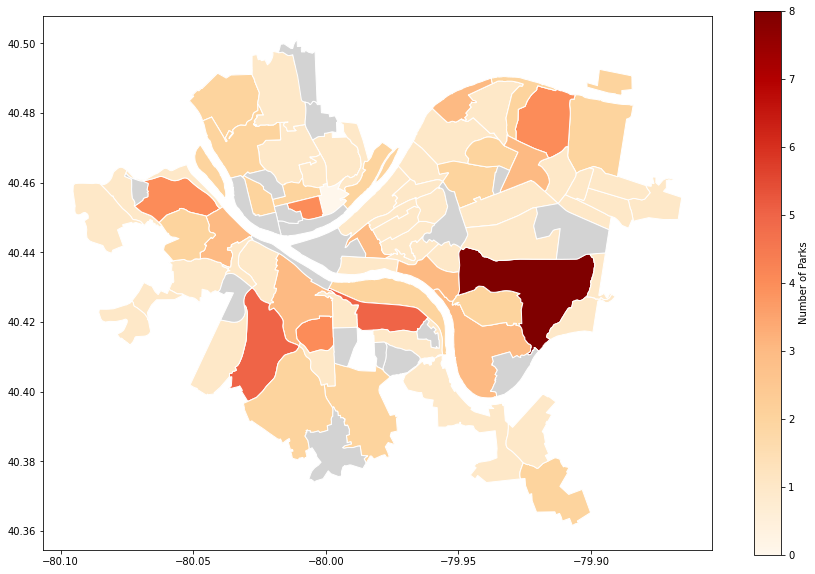

In [17]:
rec_map.plot(column='park', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

In [31]:
recreation

neighborhood
Allegheny Center       2
Allentown              1
Arlington              1
Banksville             2
Bedford Dwellings      2
                      ..
Upper Lawrenceville    3
West End               1
West Oakland           1
Westwood               1
Windgap                1
Name: park, Length: 119, dtype: int64

In [19]:
area = pd.read_csv("Neighborhood Size.csv")

In [20]:
area = area.groupby('hood').sum()['acres']
newarea = pd.DataFrame(area)
newarea

,acres
hood,
Allegheny Center,134.703
Allegheny West,90.841
Allentown,189.608
Arlington,302.320
Arlington Heights,84.592
...,...
Upper Lawrenceville,260.349
West End,128.679
West Oakland,138.372


In [21]:
dfrecreation = pd.DataFrame(recreation)

In [32]:
dfrecreation

,park
neighborhood,
Allegheny Center,2
Allentown,1
Arlington,1
Banksville,2
Bedford Dwellings,2
...,...
Upper Lawrenceville,3
West End,1
West Oakland,1


In [23]:
recarea = pd.concat([dfrecreation, newarea])
recarea

,park,acres
Allegheny Center,2.0,NaN
Allentown,1.0,NaN
Arlington,1.0,NaN
Banksville,2.0,NaN
Bedford Dwellings,2.0,NaN
...,...,...
Upper Lawrenceville,NaN,260.349
West End,NaN,128.679
West Oakland,NaN,138.372
Westwood,NaN,445.009


In [33]:
reca = dfrecreation.merge(newarea, right_on='hood')

TypeError: object of type 'NoneType' has no len()